# Create MERA time series for comparison with measurements

In [1]:
import os
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import rioxarray as rxr
from geocube.api.core import make_geocube
from rasterstats import zonal_stats
from shapely.geometry import Polygon
import xarray as xr
import climag.plot_configs as cplt

## Model results

In [2]:
ds = xr.open_mfdataset(
    os.path.join(
        "data", "ModVege", "MERA", "modvege_IE_MERA_FC3hr_3_day_*.nc"
    ),
    decode_coords="all", chunks="auto"
)

In [3]:
# limit to MERA time series
ds = ds.sel(time=slice("1981-01-01", "2019-08-31"))

In [4]:
# keep only growth
ds = ds.drop_vars([i for i in ds.data_vars if i != "gro"])

In [5]:
# # resample - yearly average
# ds_ = cplt.weighted_average(data=ds, averages="year")

In [6]:
# resample - weekly average
ds_ = ds.resample(time="W-MON").mean()

In [7]:
for var in ds_.data_vars:
    ds_[var].attrs = ds[var].attrs

In [8]:
ds_.rio.write_crs(cplt.lambert_conformal, inplace=True)

<xarray.Dataset>
Dimensions:            (x: 158, y: 166, time: 2018)
Coordinates:
  * x                  (x) float64 4.15e+05 4.175e+05 ... 8.05e+05 8.075e+05
  * y                  (y) float64 4.075e+05 4.1e+05 ... 8.175e+05 8.2e+05
    height             float64 0.0
    Lambert_Conformal  int64 0
  * time               (time) datetime64[ns] 1981-01-05 ... 2019-09-02
    spatial_ref        int64 0
Data variables:
    gro                (time, y, x) float32 dask.array<chunksize=(1, 166, 158), meta=np.ndarray>
Attributes:
    creation_date:  2023-03-25 20:11:18.719312+00:00
    contact:        nstreethran@ucc.ie
    frequency:      day
    references:     https://github.com/ClimAg
    input_dataset:  IE_MERA_FC3hr_3_day

In [84]:
os.makedirs(os.path.join("data", "ModVege", "growth", "week"), exist_ok=True)

In [85]:
# save each week as netCDF
for t in ds_["time"].values:
    ds_.sel(time=str(t)[:10]).to_netcdf(
        os.path.join(
            "data", "ModVege", "growth", "week",
            f"MERA_growth_{str(t)[:10]}.nc"
        )
    )

## County boundaries

In [9]:
counties = gpd.read_file(
    os.path.join("data", "boundaries", "boundaries.gpkg"),
    layer="OSi_OSNI_IE_Counties_2157"
)

In [10]:
counties

,CONTAE,COUNTY,PROVINCE,geometry
0,Dún na nGall,DONEGAL,Ulster,"MULTIPOLYGON (((668515.913 943718.890, 668514...."
1,Luimneach,LIMERICK,Munster,"POLYGON ((565662.328 665775.167, 565663.255 66..."
2,Cill Dara,KILDARE,Leinster,"POLYGON ((700193.727 734740.683, 700202.676 73..."
3,Port Láirge,WATERFORD,Munster,"MULTIPOLYGON (((627774.638 593971.494, 627777...."
4,Baile Átha Cliath,DUBLIN,Leinster,"MULTIPOLYGON (((730410.012 750574.906, 730401...."
5,An Iarmhí,WESTMEATH,Leinster,"POLYGON ((641367.591 732152.211, 641366.980 73..."
6,Muineachán,MONAGHAN,Ulster,"MULTIPOLYGON (((675985.454 835478.726, 676014...."
7,Cill Mhantáin,WICKLOW,Leinster,"MULTIPOLYGON (((725064.152 671911.669, 725060...."
8,Corcaigh,CORK,Munster,"MULTIPOLYGON (((539837.098 620406.502, 539820...."
9,Ciarraí,KERRY,Munster,"MULTIPOLYGON (((444169.720 600758.236, 444174...."


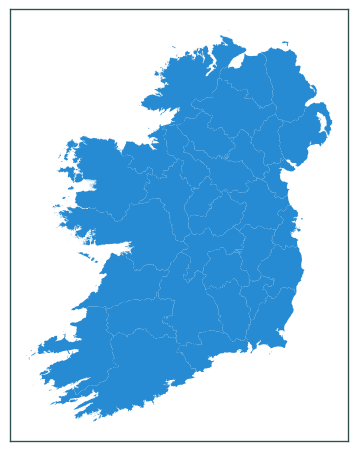

In [12]:
fig = counties.plot()
fig.axes.tick_params(labelbottom=False, labelleft=False)
plt.tight_layout()
plt.show()

## Zonal stats

In [13]:
stats = {}

In [14]:
for t in ds_["time"].values:
    stats[str(t)[:10]] = gpd.GeoDataFrame.from_features(
        zonal_stats(
            vectors=counties.to_crs(cplt.lambert_conformal),
            raster=os.path.join(
                "data", "ModVege", "growth", "week",
                f"MERA_growth_{str(t)[:10]}.nc"
            ),
            stats=["mean"],
            geojson_out=True,
            all_touched=True
        )
    )
    stats[str(t)[:10]].drop(
        columns=["geometry", "PROVINCE", "CONTAE"], inplace=True
    )
    stats[str(t)[:10]]["time"] = str(t)[:10]

In [16]:
all_data = pd.concat([df for df in stats.values()], ignore_index=True)

In [20]:
all_data.head()

,COUNTY,mean,time
0,DONEGAL,0.143106,1981-01-05
1,LIMERICK,0.367039,1981-01-05
2,KILDARE,0.196928,1981-01-05
3,WATERFORD,0.529810,1981-01-05
4,DUBLIN,0.320577,1981-01-05


In [19]:
all_data.to_csv(
    os.path.join("data", "ModVege", "growth", "MERA_growth_week.csv"),
    index=False
)